In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


df = pd.read_csv("/Users/anaantonello/Desktop/Jupter NoteBooks/data/Olympics_athlete_events.csv")


In [44]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [45]:
df.shape

(271116, 15)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Duplicates

In [47]:
duplets = df[df[['Name', 'Event', 'Year']].duplicated(keep = False)]
duplets.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1251,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [48]:
# Proportion of duplets on all data

duplet_size = round((len(duplets)/len(df))*100, 2)

f'{duplet_size}% of data are duplets in mixed, non speciefied competitions.'

'0.81% of data are duplets in mixed, non speciefied competitions.'

In [49]:
# Looking by 'Team' and 'Medals', they are not duplicates though

duplets_medal = duplets[duplets['Medal'].notna()]
duplets_medal.head(6)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4017,2317,Auguste Albert,M,NaN,NaN,NaN,Martha-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Silver
4018,2317,Auguste Albert,M,NaN,NaN,NaN,Martha-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Bronze
10911,5959,Louis Albert Auguste-Dormeuil (Dormeuil-),M,31.0,NaN,NaN,Carabinier-15,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Gold
16118,8683,Jacques Baudrier,M,28.0,NaN,NaN,Crabe II-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Silver
16119,8683,Jacques Baudrier,M,28.0,NaN,NaN,Crabe II-4,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Bronze
16120,8683,Jacques Baudrier,M,28.0,NaN,NaN,Nina Claire-2,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Bronze


## NANs

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [51]:
df.columns.tolist()

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

## Formating dataframe

In [52]:
# Rename columns

df_columns = df.rename(columns = {'Name': 'Athlete',
 'Sex':"Gender",'Event':"Competition"})
df_columns

,ID,Athlete,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Competition,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [53]:
# Create columns for each medal

df_columns['Gold'] = np.where(df_columns['Medal'] == 'Gold', 1, 0)
df_columns['Silver'] = np.where(df_columns['Medal'] == 'Silver', 1, 0)
df_columns['Bronze'] = np.where(df_columns['Medal'] == 'Bronze' ,1, 0)

df_columns.head(5)

,ID,Athlete,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Competition,Medal,Gold,Silver,Bronze
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,0


In [54]:
# Droppind undesired columns

df_columns.drop(columns=['Games', 'Team', 'Medal'], inplace = True)
df_columns.head()

,ID,Athlete,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Competition,Gold,Silver,Bronze
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0,0


In [55]:
# Set ID as index

df_columns.set_index('ID', inplace = True)
df_columns.head()

,Athlete,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Competition,Gold,Silver,Bronze
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0,0
2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0,0
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0,0,0
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1,0,0
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0,0


## Exploration and visualizations

### 1. Proportion of Women participating in Olympics along the years

In [56]:
# Group by 'Year' and 'Gender', and the number of athetes of each gender

gender_count = df_columns.groupby(['Year', 'Gender']).size().unstack()
gender_count.head(2)


Gender,F,M
Year,,
1896,NaN,380.0
1900,33.0,1903.0


In [57]:
# Proportion of each gender

prop_gender = gender_count.div(gender_count.sum(axis = 1), axis = 0).round(2)
prop_gender.head(5)

Gender,F,M
Year,,
1896,NaN,1.00
1900,0.02,0.98
1904,0.01,0.99
1906,0.01,0.99
1908,0.02,0.98


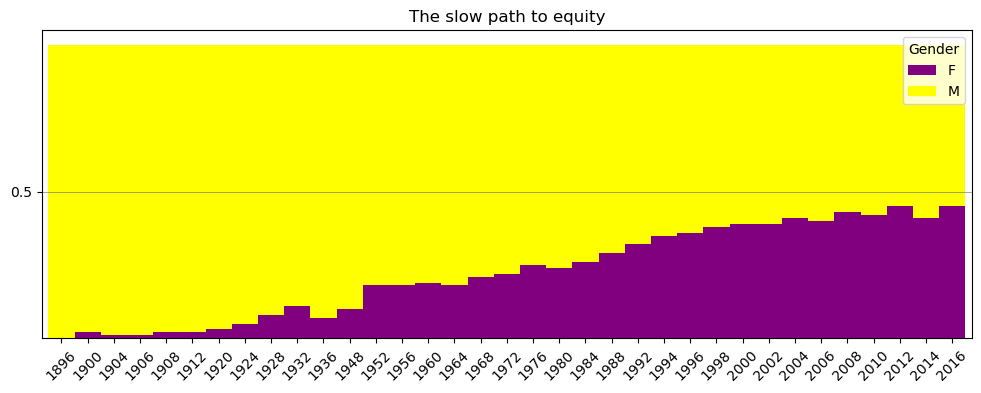

In [58]:
# Char of the growing participation of women in the Olympics until 2016

fig, ax = plt.subplots(figsize=(12, 4))


ax = prop_gender.plot(kind='bar', stacked=True, 
                 color={'M': 'yellow', 'F': 'purple'}, 
                 width=1, ax=ax)

ax.set_title('The slow path to equity')
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Gender')

ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust the y-axis ticks and add a horizontal line at y=0.5
ax.set_yticks([0.5])
ax.axhline(y=0.5, color='gray', linewidth=0.5)

plt.savefig('/Users/anaantonello/Desktop/Jupter NoteBooks/Exported-Jupiter/Gender_Years.jpeg')
plt.show()

#### 2.1 Sports with more Women participating

In [59]:
summer = df_columns[df_columns['Season'] == 'Summer']
summer.head()

,Athlete,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Competition,Gold,Silver,Bronze
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0,0
2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0,0
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0,0,0
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1,0,0
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,0,0,0


In [60]:
# Filter Woman

women_summer = summer[summer['Gender'] == 'F']
women_summer.head()

,Athlete,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Competition,Gold,Silver,Bronze
ID,,,,,,,,,,,,,,
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,0,0,0
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,0,0,0
13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,0,0,0
13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,0,0,0
21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,1,0,0


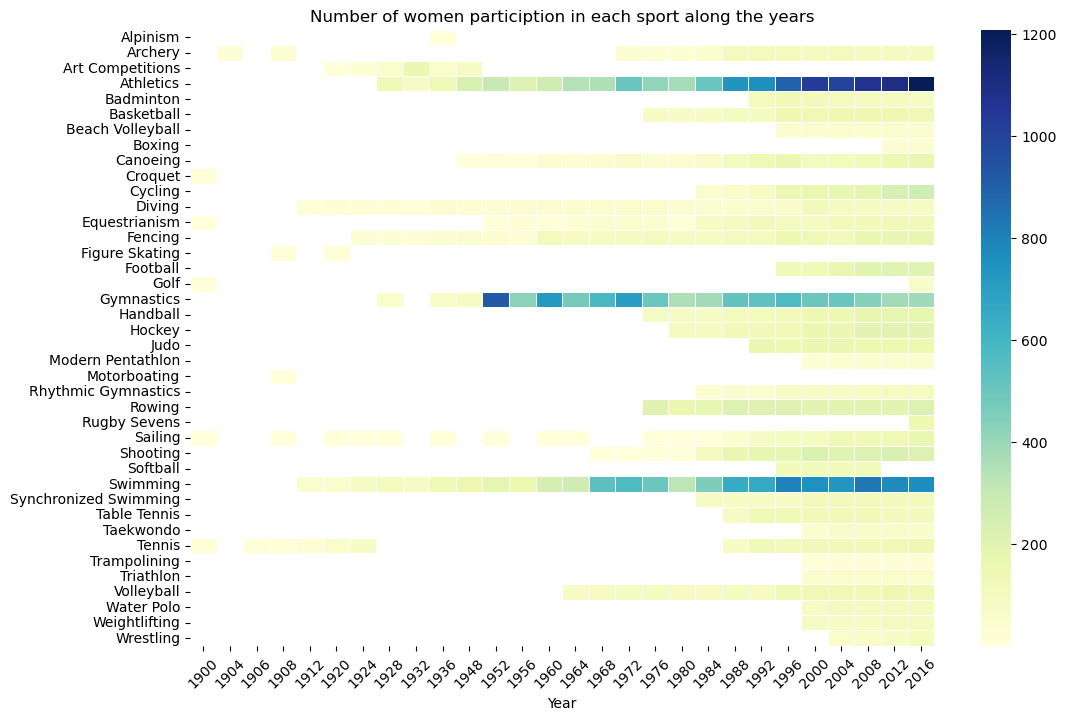

In [61]:
# Creating a matrix
pivot_data = women_summer.pivot_table(index = 'Sport', columns = 'Year', aggfunc = 'size')


# Heatmap with Seaborn
plt.figure(figsize = (12,8))

sns.heatmap(pivot_data, cmap = 'YlGnBu', linecolor = 'white', linewidth = 0.5)

plt.title('Number of women particiption in each sport along the years')
plt.ylabel('',fontsize = 5)

plt.xticks(rotation=45)

plt.show()


In [62]:
gender_sports = summer.groupby(['Sport','Year', 'Gender']).size().unstack()
gender_sports.head()


Gender               F     M
Sport       Year            
Aeronautics 1936   NaN   1.0
Alpinism    1932   NaN   2.0
            1936   1.0   1.0
Archery     1900   NaN  32.0
            1904  16.0  54.0

In [63]:
# Proportion of each gender

prop_gender_sport = gender_sports.div(gender_sports.sum(axis = 1), axis = 0).round(2)
prop_gender_sport.head(5)

Gender               F     M
Sport       Year            
Aeronautics 1936   NaN  1.00
Alpinism    1932   NaN  1.00
            1936  0.50  0.50
Archery     1900   NaN  1.00
            1904  0.23  0.77

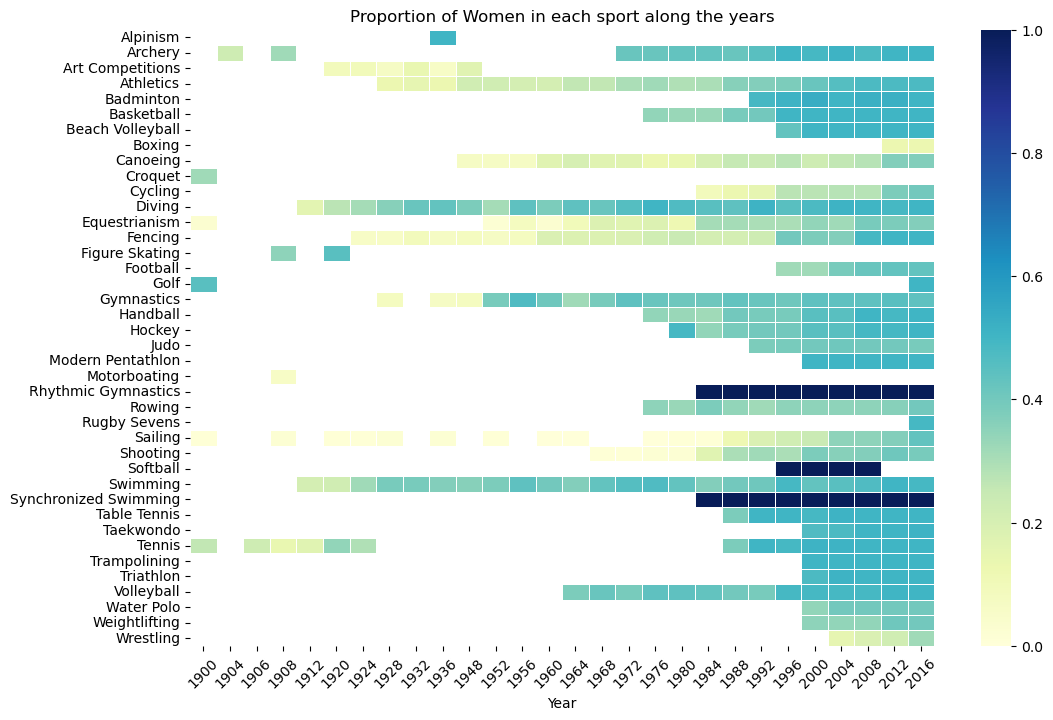

In [64]:
# Creating a matrix
pivot_sports = prop_gender_sport.pivot_table(index = 'Sport', columns = 'Year', values = 'F')


# Heatmap with Seaborn
fem_prop_heatmap = plt.figure(figsize = (12, 8))

sns.heatmap(pivot_sports, cmap = 'YlGnBu', linecolor = 'white', linewidth = 0.5)

# Customization
plt.title('Proportion of Women in each sport along the years')
plt.ylabel('',fontsize = 5)

plt.xticks(rotation=45)

plt.savefig('/Users/anaantonello/Desktop/Jupter NoteBooks/Exported-Jupiter/woman_sports.jpeg')
plt.show()

#### 2.2 National Olympic Cometees (NOC) sendin more women to Olympic games

### 3. Heaviest & Tallest sports



In [65]:
# Heaviest sports

heaviest = df_columns.groupby('Sport').median('Weight').sort_values('Weight', ascending = False)
heaviest.head(10)

,Age,Height,Weight,Year,Gold,Silver,Bronze
Sport,,,,,,,
Tug-Of-War,29.0,182.0,95.0,1908.0,0.0,0.0,0.0
Bobsleigh,28.0,182.0,90.0,1988.0,0.0,0.0,0.0
Baseball,26.0,183.0,85.0,2000.0,0.0,0.0,0.0
Basketball,25.0,190.0,85.0,1984.0,0.0,0.0,0.0
Water Polo,25.0,185.0,84.0,1980.0,0.0,0.0,0.0
Ice Hockey,25.0,180.0,82.0,1988.0,0.0,0.0,0.0
Handball,26.0,183.0,82.0,1996.0,0.0,0.0,0.0
Rowing,25.0,185.0,82.0,1980.0,0.0,0.0,0.0
Beach Volleyball,29.0,186.0,78.0,2008.0,0.0,0.0,0.0


In [66]:
# Tallest sports

tallest = df_columns.groupby('Sport').median('Height').sort_values('Height', ascending = False)
tallest.head(10)

,Age,Height,Weight,Year,Gold,Silver,Bronze
Sport,,,,,,,
Basketball,25.0,190.0,85.0,1984.0,0.0,0.0,0.0
Volleyball,25.0,187.0,78.0,1992.0,0.0,0.0,0.0
Beach Volleyball,29.0,186.0,78.0,2008.0,0.0,0.0,0.0
Water Polo,25.0,185.0,84.0,1980.0,0.0,0.0,0.0
Rowing,25.0,185.0,82.0,1980.0,0.0,0.0,0.0
Handball,26.0,183.0,82.0,1996.0,0.0,0.0,0.0
Baseball,26.0,183.0,85.0,2000.0,0.0,0.0,0.0
Bobsleigh,28.0,182.0,90.0,1988.0,0.0,0.0,0.0
Tug-Of-War,29.0,182.0,95.0,1908.0,0.0,0.0,0.0


/Users/anaantonello/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

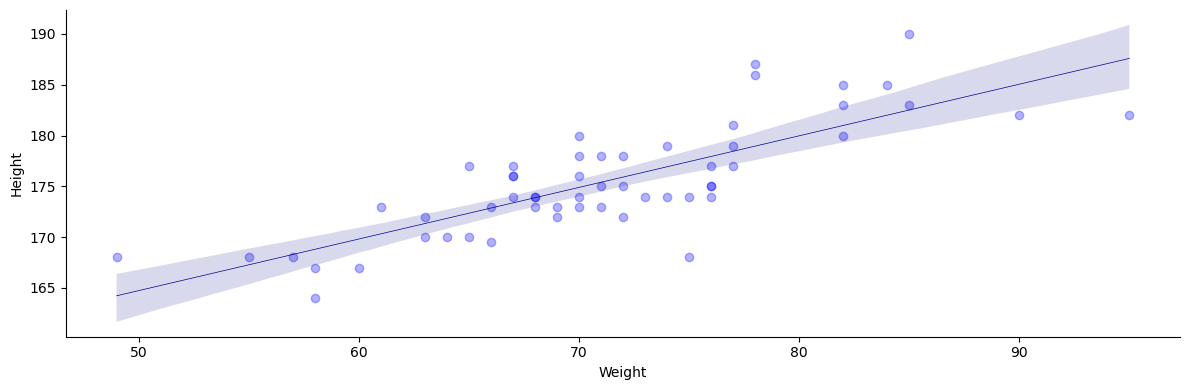

In [67]:
# Relation between Weight and Height

# Scatter plot
w_h_fig = sns.lmplot(x = "Weight", y = "Height", data = heaviest, 
                     height = 4, aspect = 3,
                     line_kws = {'color':'darkblue', 'linewidth' : 0.5}, 
                     scatter_kws = {'color' : 'blue', 'alpha' : 0.3})

plt.savefig('/Users/anaantonello/Desktop/Jupter NoteBooks/Exported-Jupiter/heigh_weight.jpeg')
plt.show